In [1]:
import pandas as pd

In [2]:
data= pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [4]:
data.rename(columns={'Taxable.Income':'Taxable_Income','Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)

In [5]:
data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
data['Status']=(data['Taxable_Income']<=30000)

d={False:'Good',True:'Risky'}

data['Status']=(data['Status'].map(d))

data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital_Status']=le.fit_transform(data['Marital_Status'])
data['Urban']=le.fit_transform(data['Urban'])


In [10]:
data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [11]:
x=data.drop('Status',axis=1)
y=data['Status']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
import numpy as np

In [17]:
y_pred=model.predict(x_test)

In [18]:
pd.crosstab(y_pred,y_test)

Status,Good,Risky
row_0,,
Good,95,0
Risky,0,25


In [19]:
np.mean(y_pred==y_test)

1.0

In [20]:
import matplotlib.pyplot as plt

[Text(167.4, 163.07999999999998, 'X[2] <= 30055.5\nentropy = 0.734\nsamples = 480\nvalue = [381, 99]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 99\nvalue = [0, 99]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 381\nvalue = [381, 0]')]

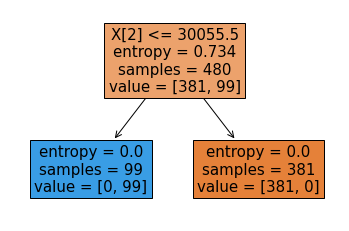

In [21]:
# plt.figure(figsize=(10,5))
tree.plot_tree(model,fontsize=15,filled=True)

# Using Gini Index

In [22]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [23]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
y_predict=model_gini.predict(x_test)

In [25]:
np.mean(y_test==y_predict)

1.0

In [26]:
pd.crosstab(y_predict,y_test)

Status,Good,Risky
row_0,,
Good,95,0
Risky,0,25
